In [2]:
import os
import json
import csv
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
# import Collections
import gensim



Text(0, 0.5, 'bytes')

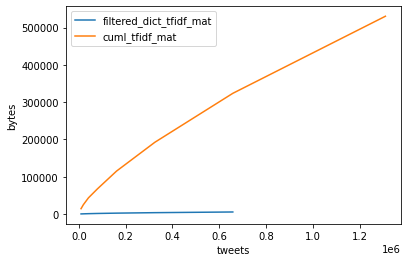

In [30]:
filenames = !ls ../results/*measure.csv

measures = {os.path.basename(name).replace('_measure.csv', ''): pd.read_csv(name) for name in filenames}

for mes in ['filtered_dict_tfidf_mat', 'cuml_tfidf_mat']:
    plt.plot(measures[mes]['tweets'], measures[mes]['cols'], label=mes)
plt.legend()
plt.xlabel('tweets')
plt.ylabel('bytes')
# stemmed load == bad interned stemmed load
# stemmed vectorize == bad interned stemmed vectorized

In [46]:
mes =
plt.plot(measures[mes]['tweets'], measures[mes]['cols'], label=mes)
plt.legend()
plt.xlabel('tweets')
plt.ylabel('bytes')

SyntaxError: invalid syntax (<ipython-input-46-e657ab37cef6>, line 1)

Text(0, 0.5, 'bytes')

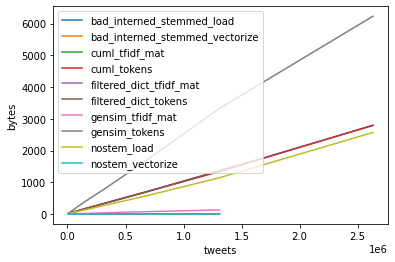

In [6]:
for mes in measures.keys():
    plt.plot(measures[mes]['tweets'], measures[mes]['time'], label=mes)
plt.legend()
plt.xlabel('tweets')
plt.ylabel('bytes')


In [8]:
# Vocabulary should not be increasing linearly! this is not what I was promised
# mem increases linearly in function of cols/tweets ... as if each tweet is adding at least one new, unique word not found in any other tweet: URLs!?
# what's gonna help: stemming, filter dictionary?
pow(2, 9)

512

In [37]:
rows = []
with open('../trained-2021-06-02/dictionary.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        rows.append(row)
rows.pop(0)

['94862426']

In [38]:
vocab = [ row[1] for row in rows ]

In [39]:
len(vocab)

2001106

In [40]:
occs = [ int(row[-1]) for row in rows ]
len(occs)


2001106

(array([  36339., 1042056.,  777024.,  118716.,   20372.]),
 array([0.0e+00, 1.5e+00, 1.0e+01, 1.0e+02, 1.0e+03, 1.0e+04]),
 <BarContainer object of 5 artists>)

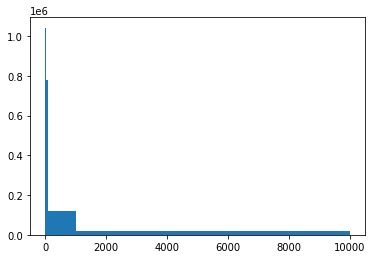

In [41]:
# plot = seaborn.histplot(occs)
# plt.hist(occs, bins=[10**i for i in range(8)])
plt.hist(occs, bins=[0, 1.5, 10, 100, 1000, 10000])

In [20]:
len([ occ for occ in occs if occ == 1 ])

0

In [22]:
len([ occ for occ in occs if occ > 10 ])

100000

In [24]:
len([ occ for occ in occs if occ <= 10 ])


0

In [26]:
[ len([ occ for occ in occs if occ < i ])/len([ occ for occ in occs if occ >= i ]) for i in range(100) ]

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [43]:
import json
with open('mindflood.json') as f:
    l = json.load(f)

In [45]:
l[-300:]

['𝘙𝘌𝘗𝘖𝘙𝘛',
 '𝘙𝘦𝘴𝘰𝘤𝘪𝘢𝘭𝘪𝘻𝘢𝘵𝘪𝘰𝘯',
 '𝘙𝘰𝘥𝘩𝘢𝘮',
 '𝘚𝘰𝘤𝘪𝘢𝘭',
 '𝘚𝘱𝘰𝘳𝘵𝘴',
 '𝘚𝘺𝘴𝘵𝘦𝘮𝘢𝘵𝘪𝘤',
 '𝘛𝘢𝘬𝘦',
 '𝘛𝘩𝘦𝘺',
 '𝘛𝘩𝘪𝘴',
 '𝘛𝘳𝘢𝘷𝘦𝘭',
 '𝘛𝘳𝘦𝘢𝘵𝘮𝘦𝘯𝘵',
 '𝘞𝘢𝘪𝘵𝘪𝘯𝘨',
 '𝘞𝘢𝘭𝘭𝘦𝘵',
 '𝘞𝘦𝘥𝘯𝘦𝘴𝘥𝘢𝘺',
 '𝘞𝘩𝘢𝘵',
 '𝘢𝘣𝘰𝘶𝘵',
 '𝘢𝘥𝘫𝘦𝘤𝘵𝘪𝘷𝘦',
 '𝘢𝘯𝘺𝘵𝘩𝘪𝘯𝘨',
 '𝘢𝘴𝘴𝘪𝘨𝘯𝘮𝘦𝘯𝘵𝘴',
 '𝘢𝘴𝘺𝘮𝘱𝘵𝘰𝘮𝘢𝘵𝘪𝘤',
 '𝘣𝘢𝘯𝘥',
 '𝘣𝘦𝘦𝘯',
 '𝘣𝘭𝘦𝘴𝘴',
 '𝘣𝘳𝘪𝘮',
 '𝘤𝘰𝘪𝘯𝘤𝘪𝘥𝘦𝘯𝘵𝘢𝘭𝘭𝘺',
 '𝘤𝘰𝘯𝘵𝘪𝘯𝘶𝘦',
 '𝘤𝘰𝘳𝘰𝘯𝘢𝘷𝘪𝘳𝘶𝘴',
 '𝘤𝘳𝘢𝘻𝘺',
 '𝘥𝘦𝘢𝘵𝘩',
 '𝘥𝘦𝘣𝘢𝘵𝘦',
 '𝘥𝘦𝘧𝘪𝘯𝘪𝘵𝘪𝘰𝘯',
 '𝘥𝘦𝘯𝘢',
 '𝘥𝘰𝘦𝘴',
 '𝘥𝘳𝘢𝘸𝘦𝘳',
 '𝘦𝘷𝘦𝘳𝘺',
 '𝘧𝘢𝘮𝘪𝘭𝘺',
 '𝘧𝘪𝘭𝘭𝘦𝘥',
 '𝘧𝘳𝘦𝘦',
 '𝘧𝘳𝘰𝘨',
 '𝘩𝘶𝘨𝘦',
 '𝘪𝘯𝘵𝘰',
 '𝘫𝘢𝘢𝘯𝘥𝘦𝘺𝘰',
 '𝘫𝘰𝘪𝘯',
 '𝘬𝘯𝘰𝘸',
 '𝘭𝘢𝘴𝘵',
 '𝘮𝘢𝘴𝘴',
 '𝘮𝘰𝘮𝘦𝘯𝘵',
 '𝘮𝘰𝘳𝘢𝘭',
 '𝘱𝘢𝘯𝘪𝘤',
 '𝘱𝘳𝘰𝘢𝘤𝘵𝘪𝘷𝘦',
 '𝘳𝘢𝘢𝘻',
 '𝘳𝘢𝘯𝘬𝘦𝘥',
 '𝘳𝘦𝘢𝘤𝘩𝘪𝘯𝘨',
 '𝘳𝘦𝘢𝘤𝘵𝘪𝘷𝘦',
 '𝘳𝘦𝘢𝘥𝘺',
 '𝘴𝘢𝘢𝘳𝘦',
 '𝘴𝘢𝘢𝘵𝘩',
 '𝘴𝘢𝘧𝘦',
 '𝘴𝘤𝘰𝘳𝘦𝘥',
 '𝘴𝘵𝘢𝘳𝘵',
 '𝘴𝘵𝘳𝘢𝘪𝘨𝘩𝘵',
 '𝘴𝘶𝘣𝘮𝘪𝘴𝘴𝘪𝘰𝘯',
 '𝘵𝘦𝘳𝘳𝘪𝘧𝘺𝘪𝘯𝘨',
 '𝘵𝘩𝘦𝘴𝘦',
 '𝘵𝘩𝘳𝘶',
 '𝘵𝘳𝘢𝘯𝘴𝘮𝘪𝘴𝘴𝘪𝘰𝘯',
 '𝘸𝘢𝘭𝘬',
 '𝘺𝘦𝘢𝘳𝘴',
 '𝘼𝘾𝘾𝙐𝙍𝘼𝙏𝙀',
 '𝘼𝙄𝙍𝙄𝙉',
 '𝘼𝙝𝙢𝙖𝙙',
 '𝘼𝙢𝙚𝙧𝙞𝙘𝙖',
 '𝘼𝙢𝙚𝙧𝙞𝙘𝙖𝙣',
 '𝘼𝙧𝙣𝙖𝙗',
 '𝘼𝙪𝙨𝙩𝙧𝙖𝙡𝙞𝙖𝙣𝙨',
 '𝘽𝘼𝘿𝙇𝙊',
 '𝘽𝙀𝙏𝙏𝙀𝙍',
 '𝘽𝙍𝙀𝘼𝙆𝙄𝙉𝙂',
 '𝘽𝙚𝙡𝙤𝙬',
 '𝘾𝙀𝙉𝙏𝙀𝙍',
 '𝘾𝙊𝙉𝘾𝙀𝙍𝙏',
 '𝘾𝙊𝙑𝙄𝘿',
 '𝘾𝙖𝙧𝙣𝙖𝙜𝙚',
 '𝘾𝙡𝙞𝙘𝙠',
 '𝘾𝙤𝙧𝙤𝙣𝙖𝙫𝙞𝙧𝙪𝙨',
 '𝘿𝘼𝙄𝙇𝙔',
 '𝘿𝙊𝙉𝘼𝙏𝙀',
 '𝘿𝙚𝙗𝙖𝙩